In [1]:
import pandas as pd
df=pd.DataFrame()

In [8]:
df = pd.read_csv(r"C:/Major Project/Python/IT.csv",index_col='year',parse_dates=True)
# df.index.freq = 'MS'

In [9]:
df.tail()

,citations
year,
2020-01-01,865
2021-01-01,16337
2022-01-01,120
2023-01-01,39
2024-01-01,0


<Axes: xlabel='year'>

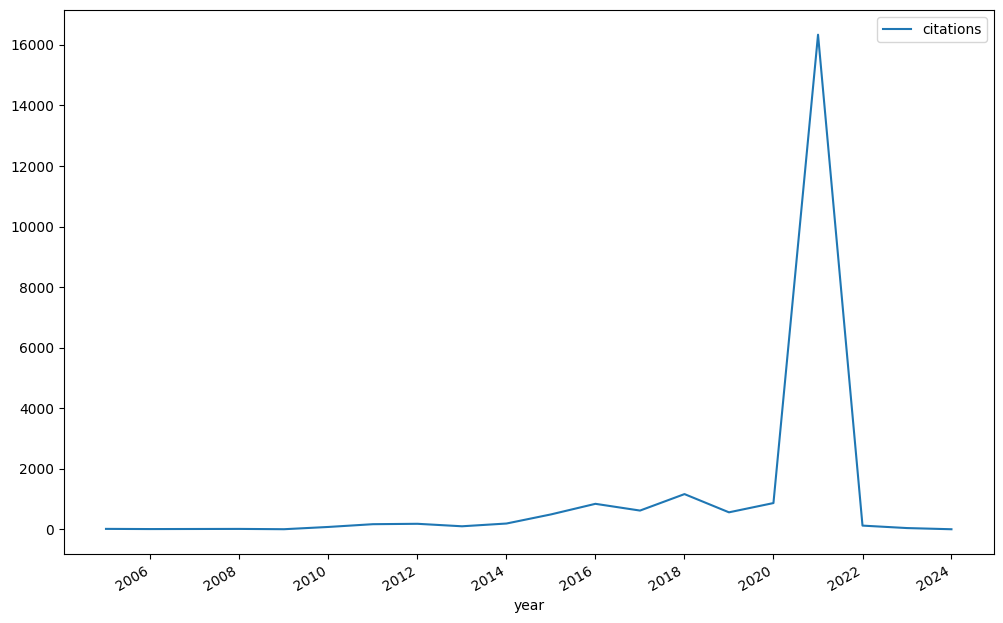

In [10]:
df.columns = ['citations']
df.plot(figsize=(12,8))

In [11]:
df['citations_1yearback']=df['citations'].shift(+1)
df['citations_2yearsback']=df['citations'].shift(+2)
df['citations_3yearsback']=df['citations'].shift(+3)
df

,citations,citations_1yearback,citations_2yearsback,citations_3yearsback
year,,,,
2005-01-01,12,NaN,NaN,NaN
2006-01-01,6,12.0,NaN,NaN
2008-01-01,11,6.0,12.0,NaN
2009-01-01,1,11.0,6.0,12.0
2010-01-01,76,1.0,11.0,6.0
2011-01-01,167,76.0,1.0,11.0
2012-01-01,180,167.0,76.0,1.0
2013-01-01,98,180.0,167.0,76.0
2014-01-01,189,98.0,180.0,167.0


In [12]:
df=df.dropna()
df

,citations,citations_1yearback,citations_2yearsback,citations_3yearsback
year,,,,
2009-01-01,1,11.0,6.0,12.0
2010-01-01,76,1.0,11.0,6.0
2011-01-01,167,76.0,1.0,11.0
2012-01-01,180,167.0,76.0,1.0
2013-01-01,98,180.0,167.0,76.0
2014-01-01,189,98.0,180.0,167.0
2015-01-01,490,189.0,98.0,180.0
2016-01-01,840,490.0,189.0,98.0
2017-01-01,617,840.0,490.0,189.0


In [13]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [14]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)


In [15]:
import numpy as np
x1,x2,x3,y=df['citations_1yearback'],df['citations_2yearsback'],df['citations_3yearsback'],df['citations']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)
print(final_x)

[[1.1000e+01 6.0000e+00 1.2000e+01]
 [1.0000e+00 1.1000e+01 6.0000e+00]
 [7.6000e+01 1.0000e+00 1.1000e+01]
 [1.6700e+02 7.6000e+01 1.0000e+00]
 [1.8000e+02 1.6700e+02 7.6000e+01]
 [9.8000e+01 1.8000e+02 1.6700e+02]
 [1.8900e+02 9.8000e+01 1.8000e+02]
 [4.9000e+02 1.8900e+02 9.8000e+01]
 [8.4000e+02 4.9000e+02 1.8900e+02]
 [6.1700e+02 8.4000e+02 4.9000e+02]
 [1.1610e+03 6.1700e+02 8.4000e+02]
 [5.5900e+02 1.1610e+03 6.1700e+02]
 [8.6500e+02 5.5900e+02 1.1610e+03]
 [1.6337e+04 8.6500e+02 5.5900e+02]
 [1.2000e+02 1.6337e+04 8.6500e+02]
 [3.9000e+01 1.2000e+02 1.6337e+04]]


In [18]:
X_train,X_test,y_train,y_test=final_x[:7],final_x[7:],y[:7],y[7:]

In [19]:
X_train

array([[ 11.,   6.,  12.],
       [  1.,  11.,   6.],
       [ 76.,   1.,  11.],
       [167.,  76.,   1.],
       [180., 167.,  76.],
       [ 98., 180., 167.],
       [189.,  98., 180.]])

In [20]:
model.fit(X_train,y_train)
lin_model.fit(X_train,y_train)

c:\python 310\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


LinearRegression()

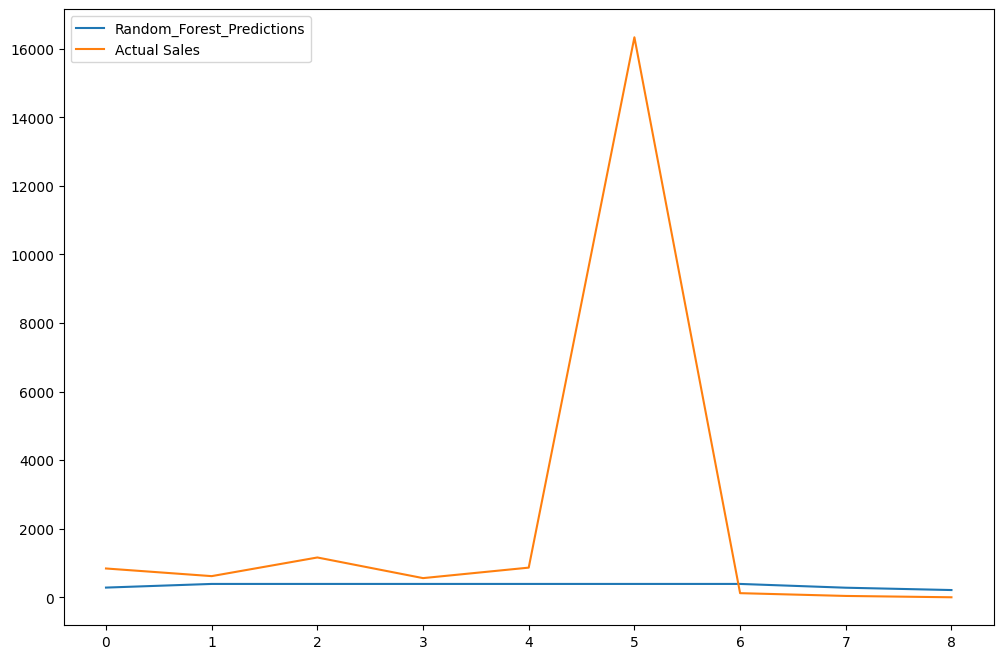

In [21]:
pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

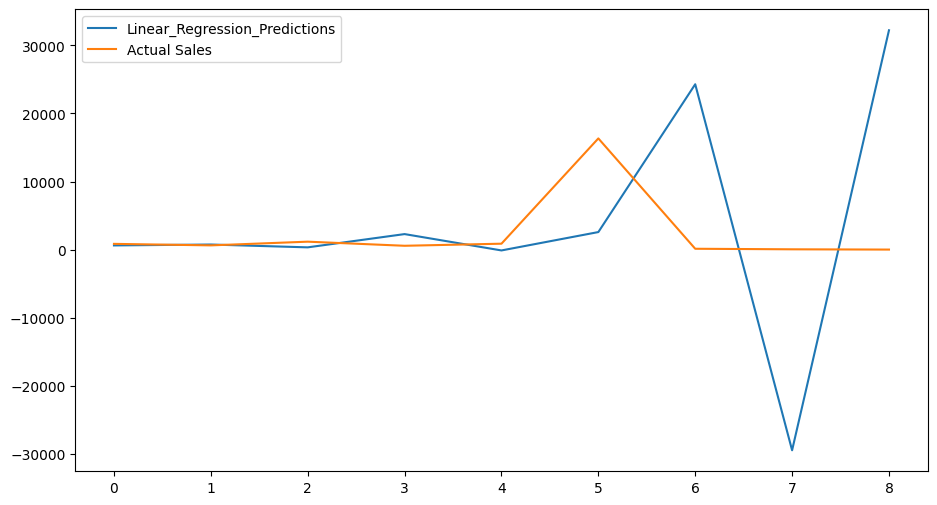

In [22]:
lin_pred=lin_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_rf=sqrt(mean_squared_error(pred,y_test))
rmse_lr=sqrt(mean_squared_error(lin_pred,y_test))

In [24]:
print('Mean Squared Error for Random Forest Model is:',rmse_rf)
print('Mean Squared Error for Linear Regression Model is:',rmse_lr)

Mean Squared Error for Random Forest Model is: 5330.3680943168565
Mean Squared Error for Linear Regression Model is: 17286.632909852844
